# 이미지 인식 - CNN
## MNIST 사례

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

In [5]:
# 컨볼루션 신경망 설정
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), 
           activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [8]:
modelpath = MODEL_DIR + "mnist-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', 
                                        patience=10)

In [9]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30,
                    batch_size=200, #epochs=5, verbose=2, 
                    callbacks=[early_stopping_callback, checkpointer])

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 38s 793us/step - loss: 0.3046 - accuracy: 0.9068 - val_loss: 0.0665 - val_accuracy: 0.9806

Epoch 00001: val_loss improved from inf to 0.06653, saving model to ./model/mnist-cnn-01-0.0665.hdf5
Epoch 2/30
48000/48000 [==============================] - 38s 789us/step - loss: 0.0975 - accuracy: 0.9721 - val_loss: 0.0504 - val_accuracy: 0.9850

Epoch 00002: val_loss improved from 0.06653 to 0.05036, saving model to ./model/mnist-cnn-02-0.0504.hdf5
Epoch 3/30
48000/48000 [==============================] - 38s 790us/step - loss: 0.0705 - accuracy: 0.9789 - val_loss: 0.0464 - val_accuracy: 0.9868

Epoch 00003: val_loss improved from 0.05036 to 0.04643, saving model to ./model/mnist-cnn-03-0.0464.hdf5
Epoch 4/30
48000/48000 [==============================] - 38s 791us/step - loss: 0.0556 - accuracy: 0.9833 - val_loss: 0.0421 - val_accuracy: 0.9879

Epoch 00004: val_loss improved from 0.0

In [14]:
from keras.models import load_model
del model
model = load_model('model/mnist-cnn-08-0.0344.hdf5')

In [15]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % 
      (model.evaluate(X_test, Y_test, verbose=0)[1]))


 Test Accuracy: 0.9901


In [12]:
# 검증셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

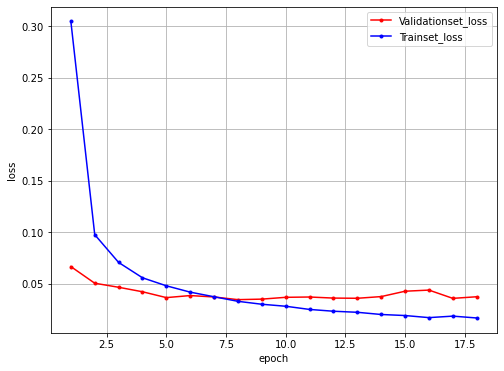

In [13]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validationset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
#plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 결론: Best Model은 Epoch 8, 정확도는 99.01%